## Experiment Setup

- Wofs LS5, full history query
- Tile -9 -18, chunk (8,2)
- 1416 time slices
- Access one chunk from each time slice
- M5.xlarge instance 4 cores 16G ram
- Chunk with largest compressed size was chosen
- S3 bucket and EC2 both in Sydney region

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pickle
from types import SimpleNamespace
from utils import bench

## Load data

In [2]:
files = ['M5XL_-9_-18b8_2B1__{:02d}_001.pickle'.format(i) for i in (1,4,8,12,16,20,24,28,32)]
dd = [pickle.load(open(file, 'rb')) for file in files]

## Scaling with more threads

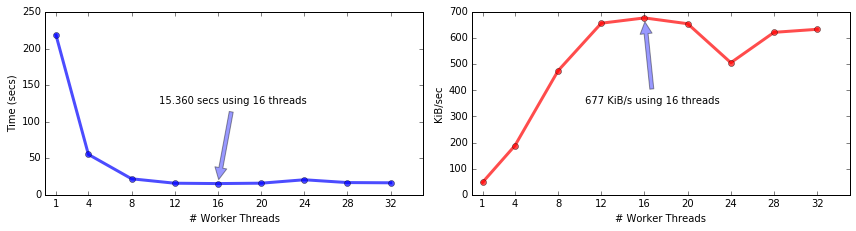

In [3]:
fig = plt.figure(figsize=(12,6))
best_idx = bench.plot_stats_results(dd, fig=fig)

## In depth stats for fastest case

-------------------------------------------------------------
Tile: (-9,-18)@8_2#1
   - blocks  : 256x256@uint8
   - nthreads: 16
-------------------------------------------------------------

Files read             : 1416
Total data bytes       : 10,654,031
  (excluding headers)
Bytes per chunk        : 7524 [5557..17894] bytes

Time:
 per tile:
  - total   172.743 [56.0.....1626.4] ms
  - open    143.105 [37.6.....1589.8] ms 81.4%
  - read     29.638 [11.5......244.2] ms 18.6%

 total_cpu: 245.00 sec
 walltime : 15.36 sec
-------------------------------------------------------------


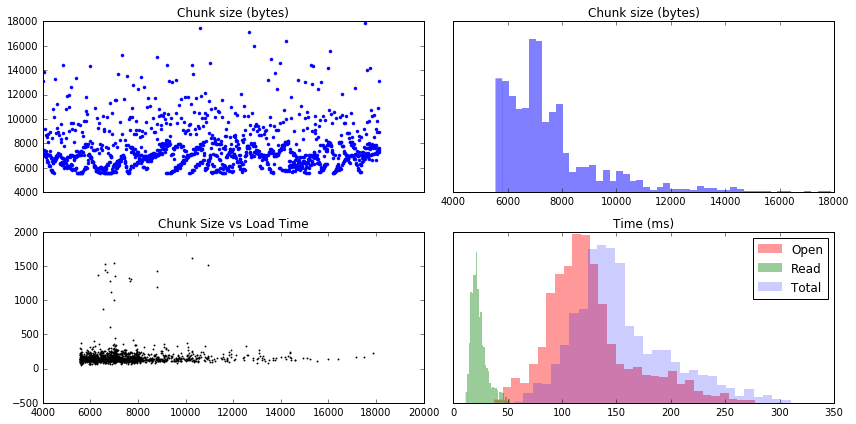

In [4]:
print(bench.gen_stats_report(dd[best_idx]))
fig = plt.figure(figsize=(12,6))
bench.plot_results(dd[best_idx].stats, fig=fig);

## Analysis

- Open costs dominate (80%) of total processing time
- Scales well with more processing workers
  - limited by latency not throughput
  - Seems like having more than 3 threads per core generates very little extra gain, and more than 4 is counter-productive.
